In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)

## 2019 Airline Delays

## 1. Introduction
As someone who likes to travel a couple of times per year, my least favorite part of traveling is being at the airport. The hustle to get there on time, get through the security line, and finding your gate is enough of a pain. But nothing is worse than being stuck waiting on a delayed a flight.

Here I will analyze data from flights 

# 2. The Data

This dataset is an aggregation of flight data gathered from the Bureau of Transportation and weather data from the National Centers for Environmental Information.

The dataset contains 6,489,062 rows each representing a single flight.

There are 26 columns:
+ Month: Month of the flight.
+ Day_Of_Week: Day of week of the flight.
+ Dep_Del15: Binary of departure delay over 15 minutes.
+ Dep_Time_Blk: Departure time block.
+ Distance_Group: Distance group to be flown by departing aircraft.
+ Segment_Number: The segment that this tail number is on for the day.
+ Concurrent_Flights: Concurrent flights leaving from the airport in the same departure block.
+ Number_Of_Seats: Number of seats on the aircraft.
+ Carrier_Name: Carrier.
+ Airport_Flights_Month: Average airport flights per month. 
+ Airline_Flights_Month:  Average airline flights per month.
+ Airline_Airport_Flights_Month: Average flights per month for airline AND airport.
+ Avg_Monthly_Pass_Airport: Average passengers for the departing airport for the month.
+ Avg_Monthly_Pass_Airline: Average passengers for airline for month.
+ Flt_Attendants_Per_Pass: Flight attendants per passenger for airline.
+ Ground_Serv_Per_Pass: Ground service employees per passenger for airline (service desk employees).
+ Plane_Age: Age of departing aircraft.
+ Departing_Airport: Departing airport.
+ Latitude: Latitude of departing airport.
+ Longitude: Longitude of departing airport.
+ Previous_Airport: Previous airport that aircraft departed from.
+ Prcp: Inches of precipitation for day.
+ Snow: Inches of snowfall for day.
+ SNWD: Inches of snow on the ground for day.
+ TMax: Max temperature for day.
+ AWND: Max wind speed for day.

The dataset contains no null values.

In [2]:
df = pd.read_csv('full_data_flightdelay.csv')

In [3]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [4]:
df.isnull().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

# 3. The Correlation Matrix

To check for correlations, I want to first create a correlation matrix. First, I convert the categorical data to numbered categories so they can be represented by numerical values and create a correlation matrix of all the variables in the dataset.

Then, I create a separate dataframe containing only the correlation values that are associated with the departure delay variable and visualize that information.

In [5]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

In [6]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()

In [7]:
sorted_pairs = corr_pairs.sort_values().reset_index()

In [8]:
sorted_pairs.rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'}, inplace=True)

In [9]:
pd.set_option('display.max_rows', None)
dep15_corr = sorted_pairs[sorted_pairs['Variable 1'] == 'DEP_DEL15']
dep15_corr = dep15_corr.drop(dep15_corr.index[-1])

Text(0, 0.5, 'Variable')

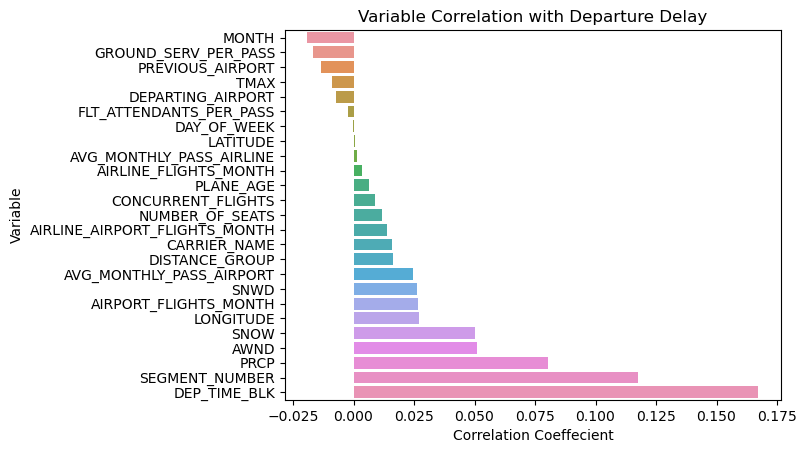

In [10]:
sns.barplot(x='Correlation', y='Variable 2', data=dep15_corr, orient='h')
plt.title('Variable Correlation with Departure Delay')
plt.xlabel('Correlation Coeffecient')
plt.ylabel('Variable')

Unsurprisingly, the weather variables have some of the highest correlation with delays. We can also see that the departure time block and segment number have very high correlation compare to the other variables.

# 4. Weather

Let's first take a look at the weather variables. I'll start by creating new dataframes for each weather variable and calculating the percentage of delayed flights for each unique value of those variables.

In [11]:
prcp_df = df.groupby('PRCP')['DEP_DEL15'].agg([('Total Flights', 'count'), ('Total Delays', 'sum')]).reset_index()
prcp_df ['Perc Delays'] = prcp_df.apply(
    lambda row: row['Total Delays'] / row['Total Flights'],
    axis = 1)

awnd_df = df.groupby('AWND')['DEP_DEL15'].agg([('Total Flights', 'count'), ('Total Delays', 'sum')]).reset_index()
awnd_df ['Perc Delays'] = awnd_df.apply(
    lambda row: row['Total Delays'] / row['Total Flights'],
    axis = 1)

snow_df = df.groupby('SNOW')['DEP_DEL15'].agg([('Total Flights', 'count'), ('Total Delays', 'sum')]).reset_index()
snow_df ['Perc Delays'] = snow_df.apply(
    lambda row: row['Total Delays'] / row['Total Flights'],
    axis = 1)

snwd_df = df.groupby('SNWD')['DEP_DEL15'].agg([('Total Flights', 'count'), ('Total Delays', 'sum')]).reset_index()
snwd_df ['Perc Delays'] = prcp_df.apply(
    lambda row: row['Total Delays'] / row['Total Flights'],
    axis = 1)

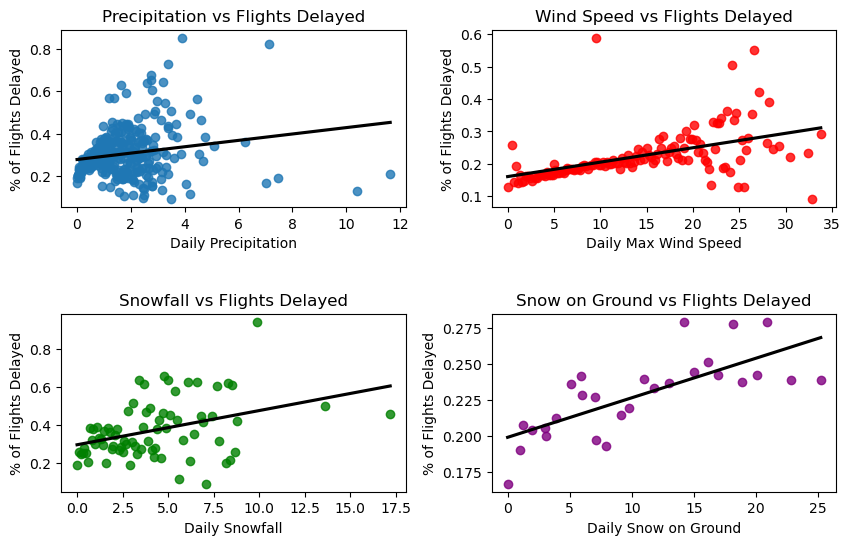

In [57]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.regplot(data=prcp_df, x='PRCP', y='Perc Delays', line_kws={'color': 'black'}, ci=None)
plt.xlabel('Daily Precipitation')
plt.ylabel('% of Flights Delayed')
plt.title('Precipitation vs Flights Delayed')

plt.subplot(2,2,2)
sns.regplot(data=awnd_df, x='AWND', y='Perc Delays', color='red', line_kws={'color': 'black'}, ci=None)
plt.xlabel('Daily Max Wind Speed')
plt.ylabel('% of Flights Delayed')
plt.title('Wind Speed vs Flights Delayed')

plt.subplot(2,2,3)
sns.regplot(data=snow_df, x='SNOW', y='Perc Delays', color='green', line_kws={'color': 'black'}, ci=None)
plt.xlabel('Daily Snowfall')
plt.ylabel('% of Flights Delayed')
plt.title('Snowfall vs Flights Delayed')

plt.subplot(2,2,4)
sns.regplot(data=snwd_df, x='SNWD', y='Perc Delays', color='purple', line_kws={'color': 'black'}, ci=None)
plt.xlabel('Daily Snow on Ground')
plt.ylabel('% of Flights Delayed')
plt.title('Snow on Ground vs Flights Delayed')

plt.subplots_adjust(hspace=.6, wspace=.25)
plt.show()

Here we can see that while all of the variables have a positive correlation on delays, snow seems to have a higher correlation than rain or wind speed. That may explain the negative correlation with the Months that we see in the correlation graph above. Further analysis would be required there.

While we can't necessarily decide when we travel based on the weather, if our goal was to
reduce the likelihood of experiencing a delay, we may want to take the weather into account.

# 5. Time Blocks

Next I want to explore the correlation between time blocks and delays. It is our strongest correlation based on the graph above and could provide key insights on avoiding delays.

In [42]:
tb_df = df.groupby('DEP_TIME_BLK').agg(
    {'DEP_DEL15': ['count', 'sum'],
     'PRCP': 'mean',
     'AWND': 'mean',
     'SNOW': 'mean',
     'SNWD': 'mean'}).reset_index()
tb_df.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in tb_df.columns]
tb_df.rename(columns={'DEP_TIME_BLK': 'Time Block', 'DEP_DEL15_count': 'Total Flights', 'DEP_DEL15_sum': 'Total Delays', 'PRCP_mean': 'Avg Prcp', 'AWND_mean': 'Avg Wind',
                      'SNOW_mean': 'Avg Snow', 'SNWD_mean': 'Avg SNWD'}, inplace=True)
tb_df['Perc Delays'] = tb_df.apply(
    lambda x: x['Total Delays'] / x['Total Flights'],
    axis = 1)
tb_df.sort_values(by='Time Block', ascending=True, inplace=True)

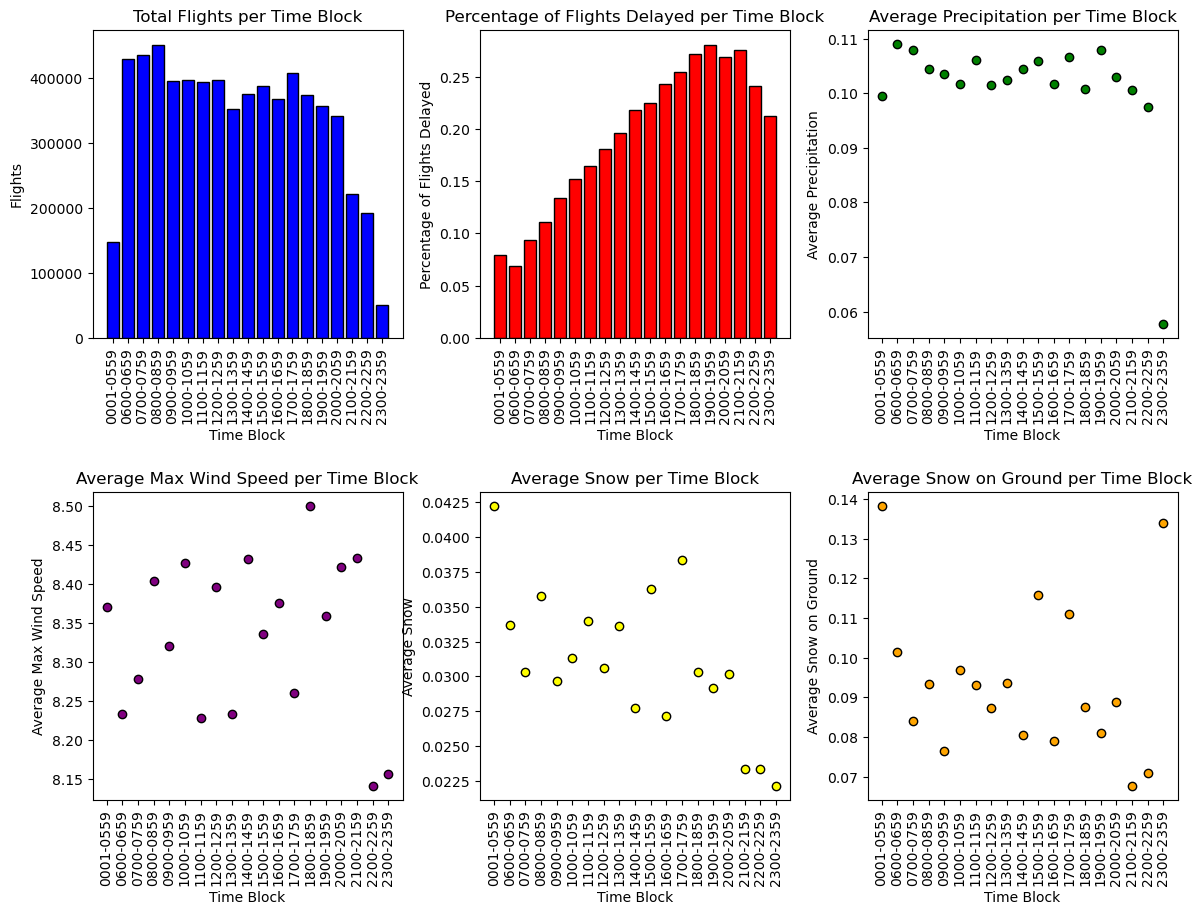

In [48]:
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
plt.bar(tb_df['Time Block'], tb_df['Total Flights'], edgecolor='black', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Time Block')
plt.ylabel('Flights')
plt.title('Total Flights per Time Block')

plt.subplot(2,3,2)
ax = plt.subplot(2,3,2)
plt.bar(tb_df['Time Block'], tb_df['Perc Delays'], edgecolor='black', color='red')
plt.xticks(rotation=90)
plt.xlabel('Time Block')
plt.ylabel('Percentage of Flights Delayed')
plt.title('Percentage of Flights Delayed per Time Block')

plt.subplot(2,3,3)
plt.scatter(tb_df['Time Block'], tb_df['Avg Prcp'], edgecolor='black', color='green')
plt.xticks(rotation=90)
plt.xlabel('Time Block')
plt.ylabel('Average Precipitation')
plt.title('Average Precipitation per Time Block')

plt.subplot(2,3,4)
plt.scatter(tb_df['Time Block'], tb_df['Avg Wind'], edgecolor='black', color='purple')
plt.xticks(rotation=90)
plt.xlabel('Time Block')
plt.ylabel('Average Max Wind Speed')
plt.title('Average Max Wind Speed per Time Block')

plt.subplot(2,3,5)
plt.scatter(tb_df['Time Block'], tb_df['Avg Snow'], edgecolor='black', color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Time Block')
plt.ylabel('Average Snow')
plt.title('Average Snow per Time Block')

plt.subplot(2,3,6)
plt.scatter(tb_df['Time Block'], tb_df['Avg SNWD'], edgecolor='black', color='orange')
plt.xticks(rotation=90)
plt.xlabel('Time Block')
plt.ylabel('Average Snow on Ground')
plt.title('Average Snow on Ground per Time Block')
plt.subplots_adjust(hspace=.5, wspace=.25)
plt.show()

Here we can see that the percentage of delayed flights is skewed lower in the early morning and higher as the day goes on and into the night. However, the averages of the weather variabels do not show much correlation with the time of day.

Looking at the total number of flights, we see the fewest flights between the hours of 11pm and 6am. The rest of the day is fairly consistent with the highest number of flights being between 6am and 10am.

The would suggest that the total number of flights in a given time block does not have much of an effect on the percentage of flights delayed in that time block. The increase in delays later in the day must be related to something else, perhaps the total number of flights prior to the time block or an increase in flights being in a later segment of their route.

Although there more flights that arrive in the early morning than any other time of day, a smaller percentage of flights during that those times are delayed.

The increased delays later in the day could be caused by the fact that one delayed flight might have a domino-type effect on delaying later flights. So the chances of a flight being delayed may be less effected by the number of flights arriving in that exact time slot, but the total number of flights that arrived earlier in the day.

I'm also interested in seeing which airlines have the highest percentage of delayed flights. I aggregate the airline specific data similarly to above.

# 6. Airlines

Finally, I want to take a look at the different airlines to see which airlines experience the most delays.

In [19]:
flights_per_airline = df['CARRIER_NAME'].value_counts().reset_index()
flights_per_airline.rename(columns={'index': 'Carrier', 'CARRIER_NAME': 'Total Flights'}, inplace=True)
delayed_flights_per_airline = df[df['DEP_DEL15'] == 1].groupby('CARRIER_NAME')['DEP_DEL15'].count().reset_index()
delayed_flights_per_airline.rename(columns={'DEP_DEL15': 'Delayed Flights', 'CARRIER_NAME': 'Carrier'}, inplace=True)

In [20]:
delayed_flights_per_airline = delayed_flights_per_airline.merge(flights_per_airline, on='Carrier', how='left')

In [21]:
delayed_flights_per_airline['Perc Delays'] = delayed_flights_per_airline.apply(
    lambda x: x['Delayed Flights'] / x['Total Flights'],
    axis = 1)

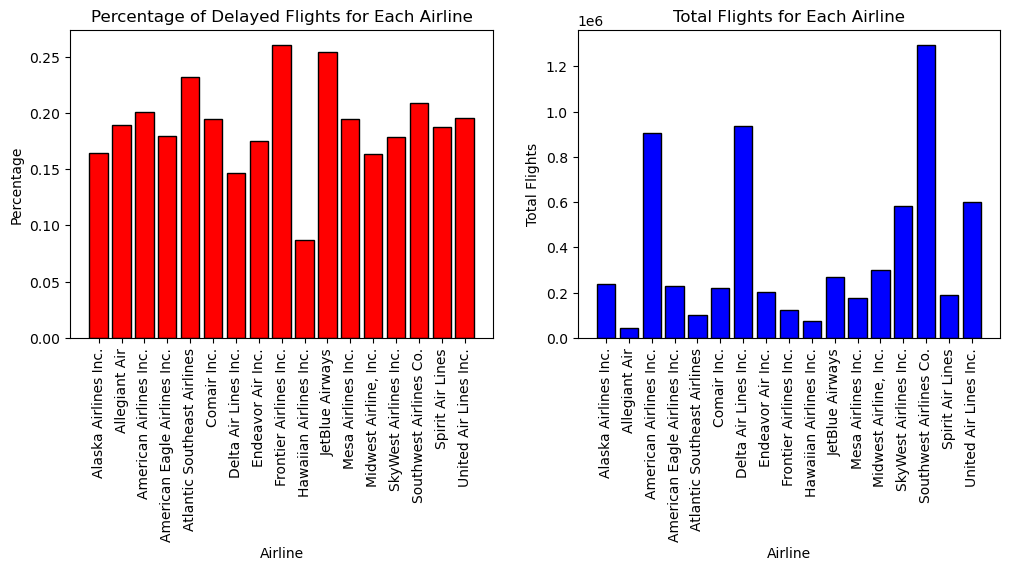

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(delayed_flights_per_airline['Carrier'], delayed_flights_per_airline['Perc Delays'], edgecolor='black', color='red')
plt.xticks(rotation=90)
plt.title('Percentage of Delayed Flights for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage')

plt.subplot(1,2,2)
plt.bar(delayed_flights_per_airline['Carrier'], delayed_flights_per_airline['Total Flights'], edgecolor='black', color='blue')
plt.xticks(rotation=90)
plt.title('Total Flights for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Total Flights')
plt.show()

Here we can see that Frontier Airlines had the highest percentage of their flights delayed, but accounted for a very small portion of the total flights. Conversely, Hawaiian Airlines, another airline that accounted for a small portion of total flights, had the lowest percentage of their flights delayed.

This suggests that the airlines with a higher percentage of delayed flights is likely not caused by the number of flights the airline makes, but some other factor. Perhaps certain airlines primarly operate in areas where weather could be a factor, fly more during time blocks where delays are more likely, or operate flights that tend to have more segments than other airlines.

# 7. Conclusion

It is clear to me that the time that you fly has the highest impact on your chances for experiencing a flight delay. If your primary goal when booking your flight was to prevent decrease your chances of experience a delay as much as possible, I would suggest flying early in the morning, before 8AM.